# Linear Regression EDA
## Marissa Burton

This file explores how different predictor variables impact the target variables of moisture, aftertaste, and flavor in the coffee dataset.

In [33]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as plt
import statsmodels
import seaborn as sns

In [16]:
# Load in data
coffee = pd.read_csv('FINAL_DATA.csv')

In [17]:
coffee

,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Altitude,Species
0,Thailand,1,10,2020,2024-10-29,Washed/Wet,8.67,8.50,8.33,8.00,...,10.0,10.00,0.112,0,0,NaN,0,2025-10-29,1443.0,Arabica
1,Thailand,1,8,2025,2025-07-08,Natural/Dry,8.25,8.50,8.33,8.25,...,10.0,10.00,0.111,0,0,Green,0,2026-07-08,1450.0,Arabica
2,Thailand,1,7,2025,2025-10-02,Natural/Dry,8.42,8.42,8.17,8.17,...,10.0,10.00,0.097,0,0,Green,0,2026-10-02,1375.0,Arabica
3,Thailand,1,8,2025,2025-08-26,Natural/Dry,8.25,8.33,8.25,8.17,...,10.0,10.00,0.129,0,0,Yellow,0,2026-08-26,1200.0,Arabica
4,Thailand,1,7,2021,2025-10-02,Washed/Wet,8.33,8.25,8.08,8.08,...,10.0,10.00,0.095,0,0,Green,3,2026-10-02,1200.0,Arabica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Vietnam,15,30,2025,2025-04-07,Natural/Dry,7.42,7.25,7.17,7.50,...,10.0,7.67,0.123,0,0,Green,0,2026-04-07,550.0,Robusta
398,Brazil,1,60,2024,2024-11-20,Washed/Wet,7.25,7.25,7.08,7.08,...,10.0,7.08,0.106,0,0,Yellow,2,2025-11-20,200.0,Robusta
399,Brazil,1,60,2024,2024-11-20,Natural/Dry,7.00,7.17,7.17,6.92,...,10.0,7.08,0.106,0,0,Brown,2,2025-11-20,232.0,Robusta
400,India,5,60,2023,2024-11-20,Washed/Wet,7.25,6.67,6.83,6.67,...,10.0,6.67,0.108,0,0,Yellow,0,2025-11-20,950.0,Robusta


In [18]:
# Check data types
coffee.dtypes

Country.of.Origin        object
Number.of.Bags            int64
Bag.Weight                int64
Harvest.Year              int64
Grading.Date             object
Processing.Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Moisture                float64
Category.One.Defects      int64
Quakers                   int64
Color                    object
Category.Two.Defects      int64
Expiration               object
Altitude                float64
Species                  object
dtype: object

### Moisture as Target Variable

In [19]:
coffee[['Moisture']].describe()

,Moisture
count,402.000000
mean,0.109674
std,0.010524
min,0.081000
25%,0.103000
50%,0.110000
75%,0.116000
max,0.152000


array([[<Axes: title={'center': 'Moisture'}>]], dtype=object)

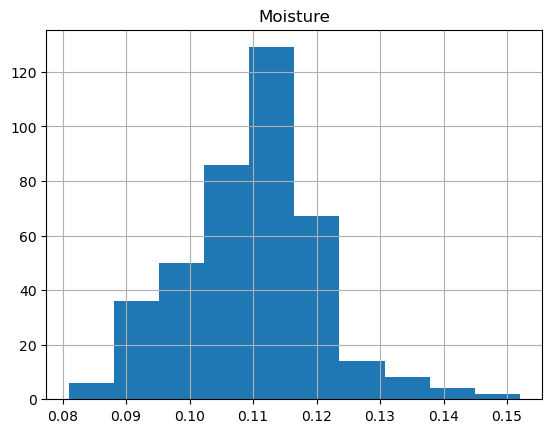

In [20]:
# Histogram of moisture
coffee[['Moisture']].hist()

Data is pretty normally distributed with values clustering around 0.11 and 0.12.

In [24]:
# Scatterplot of Acidity vs. Moisture
px.scatter(coffee, x='Acidity', y='Moisture', trendline='ols')

In [21]:
# Correlation matrix for moisture
coffee_numeric = coffee.drop(['Country.of.Origin', 'Grading.Date', 'Color', 'Species', 'Processing.Method', 'Expiration'], axis=1)

In [22]:
coffee_numeric

,Number.of.Bags,Bag.Weight,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Altitude
0,1,10,2020,8.67,8.50,8.33,8.00,8.08,8.33,10.0,10.0,10.00,0.112,0,0,0,1443.0
1,1,8,2025,8.25,8.50,8.33,8.25,8.17,8.17,10.0,10.0,10.00,0.111,0,0,0,1450.0
2,1,7,2025,8.42,8.42,8.17,8.17,8.08,8.17,10.0,10.0,10.00,0.097,0,0,0,1375.0
3,1,8,2025,8.25,8.33,8.25,8.17,8.17,8.25,10.0,10.0,10.00,0.129,0,0,0,1200.0
4,1,7,2021,8.33,8.25,8.08,8.08,8.25,8.25,10.0,10.0,10.00,0.095,0,0,3,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,15,30,2025,7.42,7.25,7.17,7.50,7.17,7.33,10.0,10.0,7.67,0.123,0,0,0,550.0
398,1,60,2024,7.25,7.25,7.08,7.08,7.33,7.17,10.0,10.0,7.08,0.106,0,0,2,200.0
399,1,60,2024,7.00,7.17,7.17,6.92,7.25,7.00,10.0,10.0,7.08,0.106,0,0,2,232.0
400,5,60,2023,7.25,6.67,6.83,6.67,7.00,6.92,10.0,10.0,6.67,0.108,0,0,0,950.0


In [28]:
corr = coffee_numeric.corr()
import plotly.express as px
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale="Picnic", zmin=-1, zmax=1)
fig.show()

Moisture is not very highly correlated with any other variable. However, this tells us which variables may be more related. Aroma, Flavor, Aftertaste, Acidity, Body, and Balance all seem to be related. I'll focus on how predictors impact Flavor, Aftertaste, and Body.

In [ ]:
# Create df for numeric variables of interest

good = coffee[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']]

## Flavor as Target Variable

<Axes: >

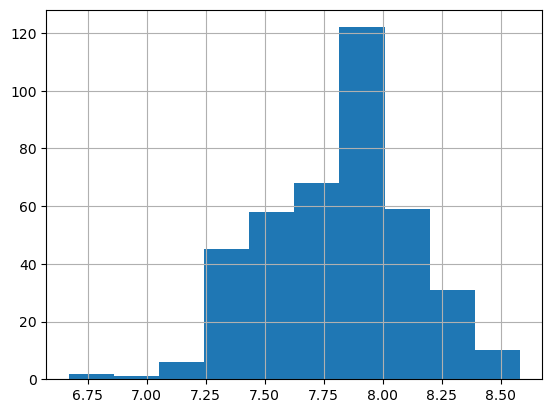

In [39]:
good['Flavor'].hist()

<Axes: xlabel='Flavor', ylabel='Density'>

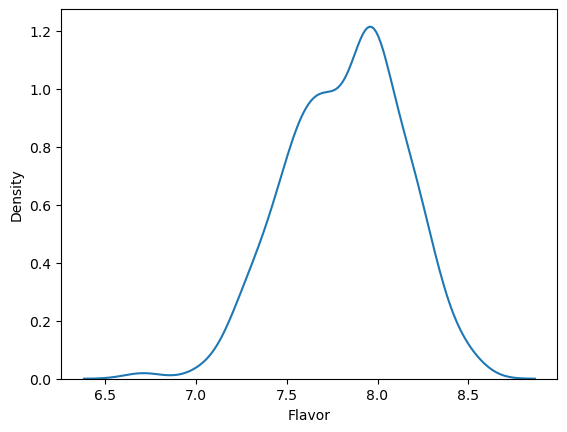

In [40]:
sns.kdeplot(good['Flavor'])

There is a slight negative skew, but most values tend to cluster between 7.75 and 8.

## Categorical Variable Impact

In [47]:
px.box(coffee, x='Processing.Method', y='Flavor')

In [50]:
coffee_grouped_flavor = coffee.groupby('Country.of.Origin')['Flavor'].mean().reset_index()
px.bar(coffee_grouped_flavor, x='Country.of.Origin', y='Flavor')

## Aftertaste as Target Variable

<Axes: >

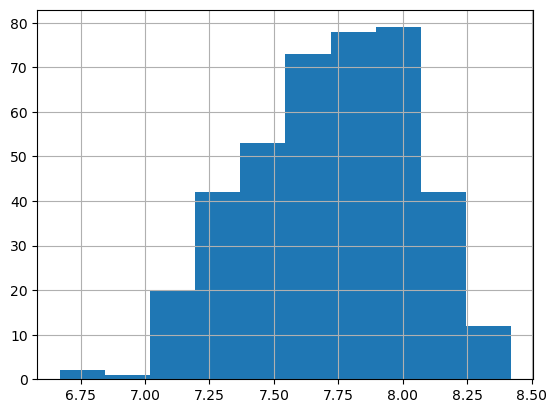

In [44]:
good['Aftertaste'].hist()

<Axes: xlabel='Aftertaste', ylabel='Density'>

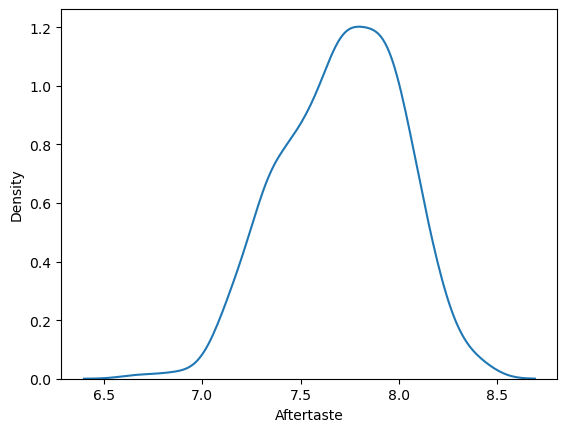

In [45]:
sns.kdeplot(good['Aftertaste'])

Observations are pretty normally distributed, with a very, very slight negative skew. Most observations cluster around 8.

## Body as Target Variable

<Axes: >

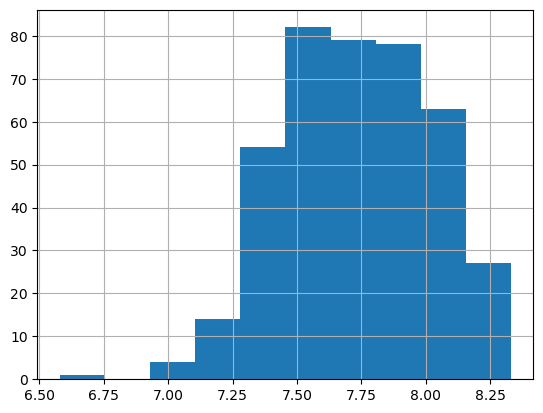

In [52]:
good['Body'].hist()

<Axes: xlabel='Body', ylabel='Density'>

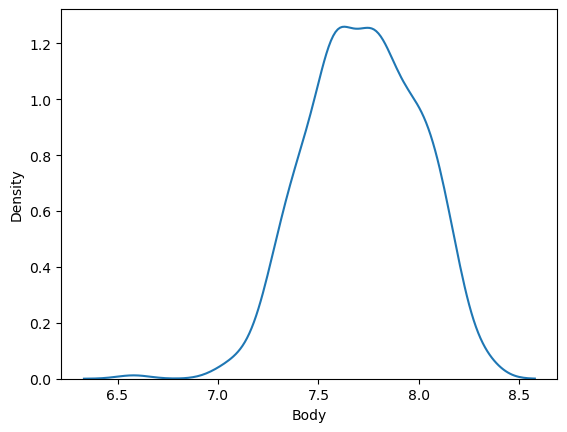

In [53]:
sns.kdeplot(coffee['Body'])

Again, there is a slight negative skew in observations. Most values tend to cluster between 7.5 and 7.75.

## Scatter Matrix of all variables in good dataset

In [38]:
px.scatter_matrix(good)

All of these represent strong, positive relationships between variables. However, since the majority of observations for these variables are between a sensory score of 6 to 10, range restriction is present; there is less variability in our data, and the standard deviations for these variables are all <0.5, which indicates tight clustering. We will need to standardize these variables before fitting for a linear regression model.

## Conclusions